<a href="https://colab.research.google.com/github/xiajones/Demo/blob/main/MeatPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Define the path to the CSV file
file_path = '/content/drive/My Drive/ISA3020/Chicken.csv'

# Read the CSV file and clean it
chicken = pd.read_csv(file_path, skiprows=4, names=['Date', 'Wholesale_Broiler_Composite', 'Retail_Broiler_Composite', 'Retail_Wholesale_Spread'])
chicken['Date'] = pd.to_datetime(chicken['Date'], format='%b-%y', errors='coerce')
chicken['Wholesale_Broiler_Composite'] = chicken['Wholesale_Broiler_Composite'].ffill()
chicken = chicken.dropna(subset=['Retail_Broiler_Composite', 'Retail_Wholesale_Spread'])

In [ ]:
file_path = '/content/drive/My Drive/ISA3020/Beef.csv'
beef = pd.read_csv(file_path, skiprows=5, names=[
    'Date', 'Byproduct', 'Gross_Farm_Value', 'Net_Farm_Value', 'Wholesale_Value',
    'Retail_Value', 'Total_Spread', 'Farm_Wholesale_Spread', 'Wholesale_Retail_Spread',
    'All_Fresh_Beef_Retail_Value'])

beef['Date'] = pd.to_datetime(beef['Date'], errors='coerce')
beef = beef.dropna(subset=['Date'])
beef['Byproduct'] = beef['Byproduct'].ffill()
beef['Gross_Farm_Value'] = beef['Gross_Farm_Value'].ffill()
beef.dropna(subset=['Retail_Value', 'Wholesale_Value'], inplace=True)

In [ ]:
file_path = '/content/drive/My Drive/ISA3020/Pork.csv'
pork = pd.read_csv(file_path, skiprows=5, names=[ 'Date', 'Byproduct', 'Gross_Farm_Value', 'Net_Farm_Value', 'Wholesale_Value', 'Retail_Value', 'Total_Spread', 'Farm_Wholesale_Spread', 'Wholesale_Retail_Spread'])

pork['Date'] = pd.to_datetime(pork['Date'], format='%m/%d/%Y', errors='coerce')
pork['Byproduct'] = pork['Byproduct'].ffill()
pork['Gross_Farm_Value'] = pork['Gross_Farm_Value'].ffill()
pork.dropna(subset=['Retail_Value', 'Wholesale_Value'], inplace=True)

In [ ]:
# How many entries are in the Beef dataset?
num_entries_beef = len(beef)
print(f"Number of entries in Beef dataset: {num_entries_beef}")

Number of entries in Beef dataset: 648


In [ ]:
# What is the average byproduct value in the Beef dataset?
average_byproduct_beef = beef['Byproduct'].mean()
print(f"Average byproduct value in Beef dataset: {average_byproduct_beef}")

Average byproduct value in Beef dataset: 20.177777777777777


In [ ]:
# What is the average retail value across all datasets (Beef, Pork, Chicken)?
average_retail_value = (beef['Retail_Value'].mean() + pork['Retail_Value'].mean() + chicken['Retail_Broiler_Composite'].mean()) / 3
print(f"Average retail value across all datasets: {average_retail_value}")

Average retail value across all datasets: 258.23925744371826


In [ ]:
# Which dataset has the highest average retail value?
datasets = ['Beef', 'Pork', 'Chicken']
average_retail_values = [beef['Retail_Value'].mean(), pork['Retail_Value'].mean(), chicken['Retail_Broiler_Composite'].mean()]
print(f"Dataset with the highest average retail value: {datasets[average_retail_values.index(max(average_retail_values))]}")

Dataset with the highest average retail value: Beef


In [ ]:
# Which date has the highest total spread in the Beef dataset?
highest_total_spread_beef = beef['Total_Spread'].idxmax()
date_highest_total_spread_beef = beef.loc[highest_total_spread_beef, 'Date']
print(f"Date with the highest total spread in Beef dataset: {date_highest_total_spread_beef}")

Date with the highest total spread in Beef dataset: 2024-10-21 00:00:00


In [ ]:
# What is the average gross farm value for Pork?
average_gross_farm_value_pork = pork['Gross_Farm_Value'].mean()
print(f"Average gross farm value for Pork: {average_gross_farm_value_pork}")

Average gross farm value for Pork: 89.27885802469136


In [ ]:
# Which month in the Pork dataset has the highest retail value?
pork['Month'] = pork['Date'].dt.to_period('M')
monthly_pork = pork.groupby('Month').first().reset_index()
highest_retail_value_month_pork = monthly_pork.loc[monthly_pork['Retail_Value'].idxmax(), 'Month']
print(f"Month with the highest retail value in Pork dataset: {highest_retail_value_month_pork}")

Month with the highest retail value in Pork dataset: 2024-09


In [ ]:
# What is the average wholesale value across all datasets?
average_wholesale_value = (beef['Wholesale_Value'].mean() + pork['Wholesale_Value'].mean() + chicken['Wholesale_Broiler_Composite'].mean()) / 3
print(f"Average wholesale value across all datasets: {average_wholesale_value}")

Average wholesale value across all datasets: 134.1496075405471


In [ ]:
# Which dataset has the highest total spread?
datasets = ['Beef', 'Pork', 'Chicken']
total_spreads = [beef['Total_Spread'].sum(), pork['Total_Spread'].sum(), chicken['Retail_Wholesale_Spread'].sum()]
print(f"Dataset with the highest total spread: {datasets[total_spreads.index(max(total_spreads))]}")

Dataset with the highest total spread: Beef


In [ ]:
# What is the average farm-wholesale spread for Beef and Pork?
average_gross_farm_value_pork = pork['Gross_Farm_Value'].mean()
average_gross_farm_value_pork = beef['Gross_Farm_Value'].mean()
print(f"Average gross farm value for Pork: {average_gross_farm_value_pork}")
print(f"Average gross farm value for Beef: {average_gross_farm_value_pork}")

Average gross farm value for Pork: 195.01358024691356
Average gross farm value for Beef: 195.01358024691356


In [ ]:
# Which date has the lowest wholesale-retail spread in the Pork dataset?
lowest_wholesale_retail_spread_pork = pork['Wholesale_Retail_Spread'].idxmin()
date_lowest_wholesale_retail_spread_pork = pork.loc[lowest_wholesale_retail_spread_pork, 'Date']
print(f"Date with the lowest wholesale-retail spread in Pork dataset: {date_lowest_wholesale_retail_spread_pork}")

Date with the lowest wholesale-retail spread in Pork dataset: 1973-07-01 00:00:00


In [ ]:
# What is the correlation between Gross Farm Value and Retail Value in the Beef dataset?
correlation_beef = beef['Gross_Farm_Value'].corr(beef['Retail_Value'])
print(f"Correlation between Gross Farm Value and Retail Value in Beef dataset: {correlation_beef}")

Correlation between Gross Farm Value and Retail Value in Beef dataset: 0.9480684437713762


In [ ]:
# What is the standard deviation of Net Farm Value for Pork?
std_dev_pork = pork['Net_Farm_Value'].std()
print(f"Standard deviation of Net Farm Value for Pork: {std_dev_pork}")

Standard deviation of Net Farm Value for Pork: 21.422328270071272


In [ ]:
# Which dataset has the lowest average byproduct value?
datasets = ['Beef', 'Pork', 'Chicken']
byproduct_values = [min(beef['Byproduct'].mean(), pork['Byproduct'].mean(), chicken['Wholesale_Broiler_Composite'].mean())]
print(f"Dataset with the lowest average byproduct value: {datasets[byproduct_values.index(min(byproduct_values))]}")

Dataset with the lowest average byproduct value: Beef


In [ ]:
# How many rows in the Chicken dataset have a retail-wholesale spread greater than 10?
chicken_filtered = chicken[chicken['Retail_Wholesale_Spread'] > 10]
num_rows_chicken = len(chicken_filtered)
print(f"Number of rows in Chicken dataset with retail-wholesale spread greater than 10: {num_rows_chicken}")

Number of rows in Chicken dataset with retail-wholesale spread greater than 10: 408


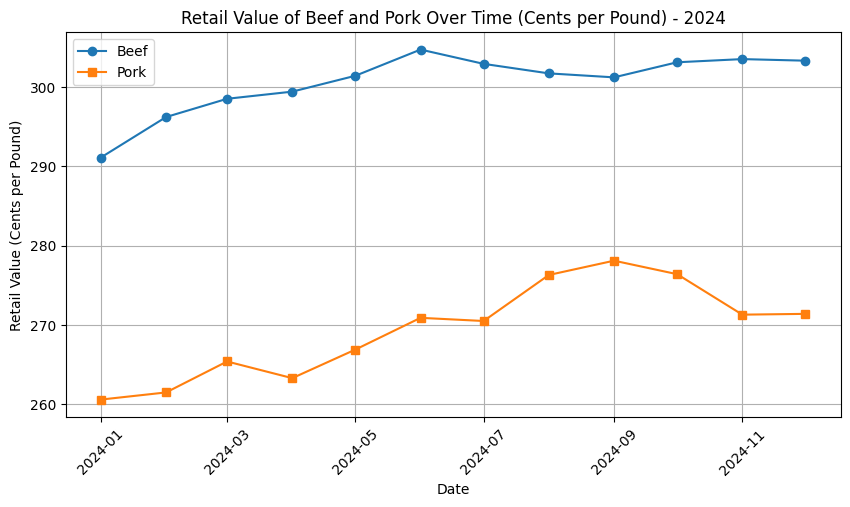

In [ ]:
import matplotlib.pyplot as plt

# Filter for 2024 and group by month
beef_2024 = beef[beef['Date'].dt.year == 2024].copy()
pork_2024 = pork[pork['Date'].dt.year == 2024].copy()

beef_2024['Month'] = beef_2024['Date'].dt.to_period('M')
pork_2024['Month'] = pork_2024['Date'].dt.to_period('M')

beef_monthly = beef_2024.groupby('Month').first().reset_index()
pork_monthly = pork_2024.groupby('Month').first().reset_index()

beef_monthly['Date'] = beef_monthly['Month'].dt.to_timestamp()
pork_monthly['Date'] = pork_monthly['Month'].dt.to_timestamp()

# Plot the updated chart
plt.figure(figsize=(10, 5))
plt.plot(beef_monthly['Date'], beef_monthly['All_Fresh_Beef_Retail_Value'], label='Beef', marker='o')
plt.plot(pork_monthly['Date'], pork_monthly['Retail_Value'], label='Pork', marker='s')

plt.xlabel('Date')
plt.ylabel('Retail Value (Cents per Pound)')
plt.title('Retail Value of Beef and Pork Over Time (Cents per Pound) - 2024')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

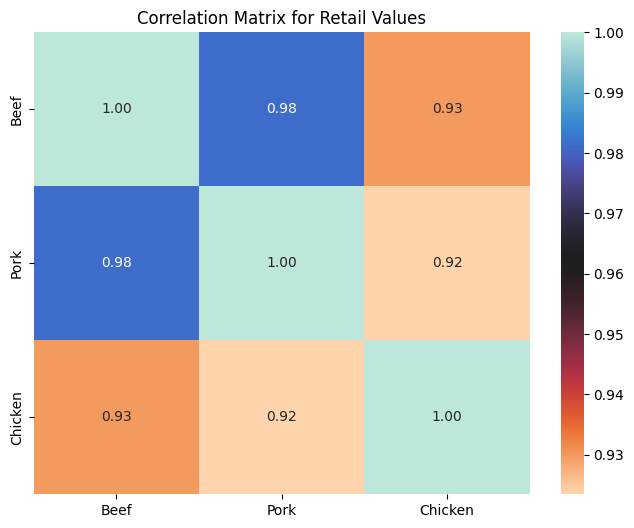

In [ ]:
#Calculate and visualize the correlation matrix for Retail Values across all datasets.
import seaborn as sns
correlation_matrix = pd.DataFrame({
    'Beef': beef['Retail_Value'],
    'Pork': pork['Retail_Value'],
    'Chicken': chicken['Retail_Broiler_Composite']
}).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='icefire_r', fmt=".2f")
plt.title('Correlation Matrix for Retail Values')
plt.show()

In [ ]:
# Calculate and Perform a linear regression to model Chicken retail prices based on Beef and Pork retail prices.

import statsmodels.api as sm
import pandas as pd



# Merge the datasets on 'Date' to align data points
merged_df = pd.merge(beef[['Date', 'Retail_Value']], pork[['Date', 'Retail_Value']], on='Date', how='inner', suffixes=('_beef', '_pork'))
merged_df = pd.merge(merged_df, chicken[['Date', 'Retail_Broiler_Composite']], on='Date', how='inner')

# Prepare the data for the linear regression model
X = merged_df[['Retail_Value_beef', 'Retail_Value_pork']]  # Features: Beef and Pork retail prices
y = merged_df['Retail_Broiler_Composite']  # Target: Chicken retail prices

# Create and fit the linear regression model
#The line below has been edited
model = sm.OLS(y, sm.add_constant(X)).fit() #add a constant to the model




# Predict chicken prices and add them to the merged dataframe
merged_df['Predicted_Chicken_Price'] = model.predict(sm.add_constant(X))

print(f"Coefficients: {model.params[1:]}") #access coefficients from params
print(f"Intercept: {model.params[0]}") #access intercept from params


print(model.summary())

Coefficients: Retail_Value_beef   -0.033736
Retail_Value_pork    0.250076
dtype: float64
Intercept: 100.75446668664223
                               OLS Regression Results                               
Dep. Variable:     Retail_Broiler_Composite   R-squared:                       0.686
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     140.7
Date:                      Mon, 31 Mar 2025   Prob (F-statistic):           3.77e-33
Time:                              19:12:22   Log-Likelihood:                -333.48
No. Observations:                       132   AIC:                             673.0
Df Residuals:                           129   BIC:                             681.6
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                        coef   

<ipython-input-137-348679e83290>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept: {model.params[0]}") #access intercept from params


In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/ISA3020/MeatPrices.ipynb" --output-dir "/content/drive/My Drive/ISA3020" --output "MeatPrices.html"

[NbConvertApp] WARNING | pattern '/content/drive/My Drive/ISA3020/MeatPrices.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp